In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import neurokit2 as nk
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('../data/1222325cFnorm.csv')
loc = pd.read_csv('../data/1222325clocation_Bites.csv')

df

,MR,ML,SU,Microphone,Eye,ECG,Pressure Sensor,Unnamed: 7
0,-0.002355,-0.052066,-0.002789,0.021630,-0.004176,0.015600,NaN,NaN
1,-0.025637,-0.566710,-0.030342,0.021635,-0.004162,0.015578,NaN,NaN
2,-0.125210,-2.767900,-0.148140,0.021643,-0.004146,0.015573,NaN,NaN
3,-0.358610,-7.927500,-0.424090,0.021636,-0.004137,0.015608,NaN,NaN
4,-0.657010,-14.524000,-0.776490,0.021626,-0.004148,0.015637,NaN,NaN
...,...,...,...,...,...,...,...,...
3230876,0.800180,5.769900,-1.260500,-0.000544,0.000101,0.094466,NaN,NaN
3230877,0.812110,5.791300,-1.282900,-0.000520,0.000123,0.098004,NaN,NaN
3230878,0.914530,5.964000,-1.442200,-0.000525,0.000086,0.093946,NaN,NaN
3230879,1.027600,6.452600,-1.610700,-0.000561,0.000023,0.084736,NaN,NaN


In [8]:
print(f"Signal duration: {datetime.timedelta(seconds=len(df.index)/2000)}")

Signal duration: 0:26:55.440500


## Visualize signals for the whole night

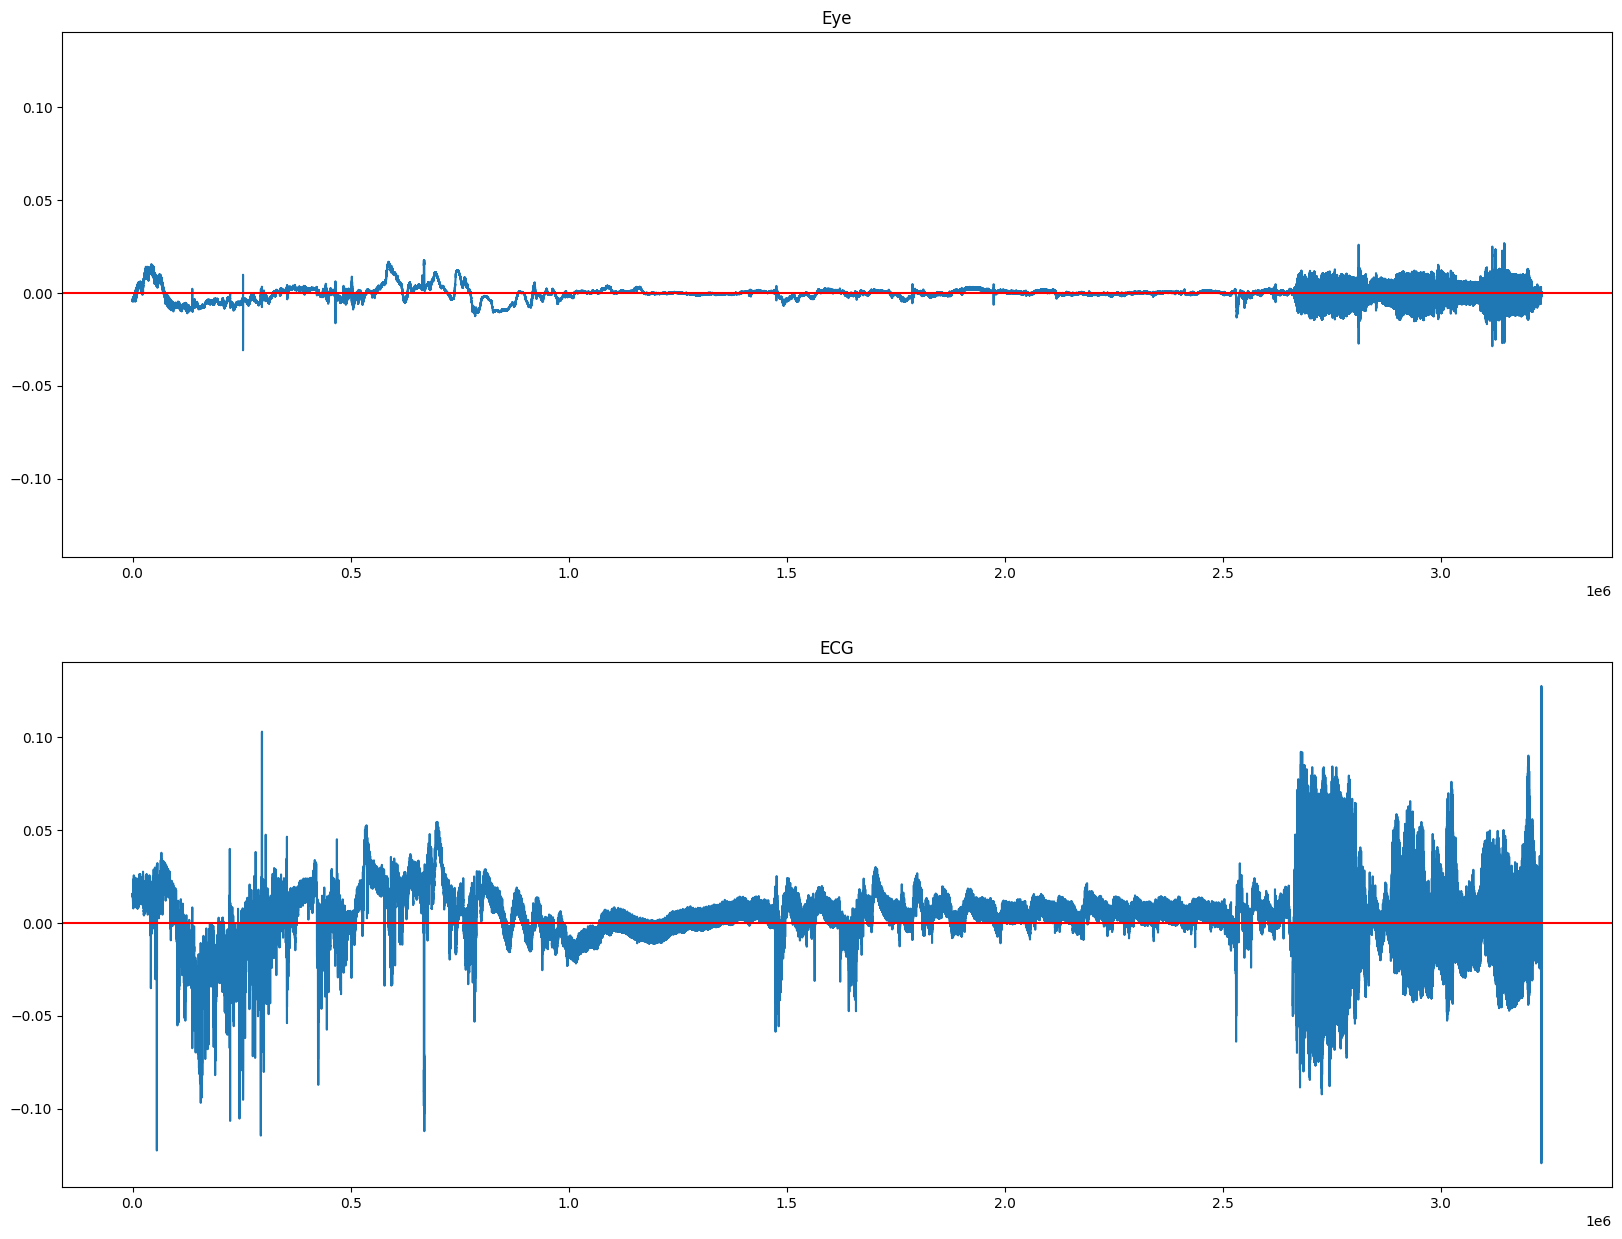

In [9]:
range_min = 0
range_max = df.index[-1]

eog_ecg = df[["Eye","ECG"]]


def plot_data(data, loc):    
    fig, axes = plt.subplots(2,1, figsize=(20, 15), sharey=True) # ensures that all subplots share the same x-axis and y-axis
    for i in range(2):
        axes[i].plot(data.iloc[range_min:range_max,i])
        axes[i].set_title(data.columns[i])

        axes[i].axhline(y=0, color='r', linestyle='-')


        #for j in range(loc.shape[0]):
        #    axes[i].axvline(x=loc.iloc[j,0], color='g', linestyle='--')
        #    axes[i].axvline(x=loc.iloc[j,1], color='y', linestyle='--')
        
plot_data(eog_ecg, loc)

## Try out Neurokit2 visualizations and down-sampling

In [10]:
ecg = df["ECG"].values.tolist()
eog = df["Eye"].values.tolist()


ecg_signals, ecg_info = nk.ecg_process(ecg_signal=ecg, sampling_rate=2000)
eog_signals, eog_info = nk.eog_process(veog_signal=eog, sampling_rate=2000)

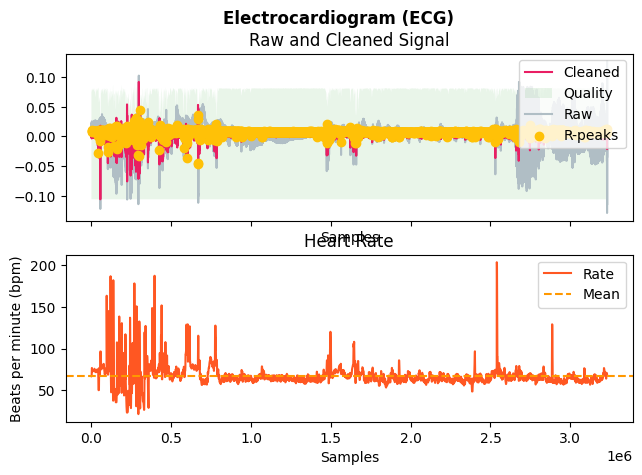

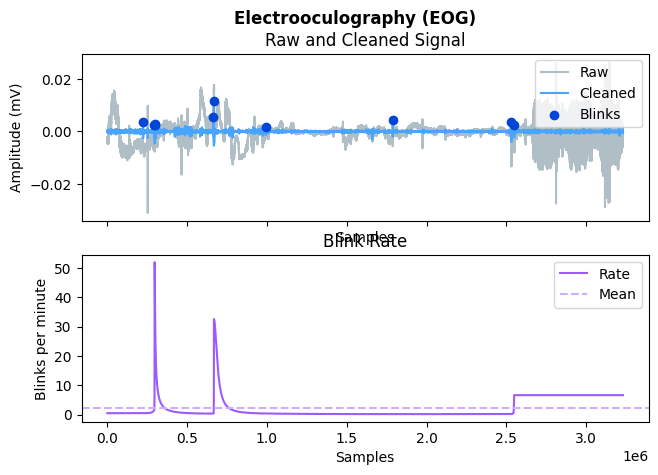

In [11]:
nk.ecg_plot(ecg_signals)

nk.eog_plot(eog_signals)

Number of data before downsampling: 3230881
Number of data after downsampling: 1615440


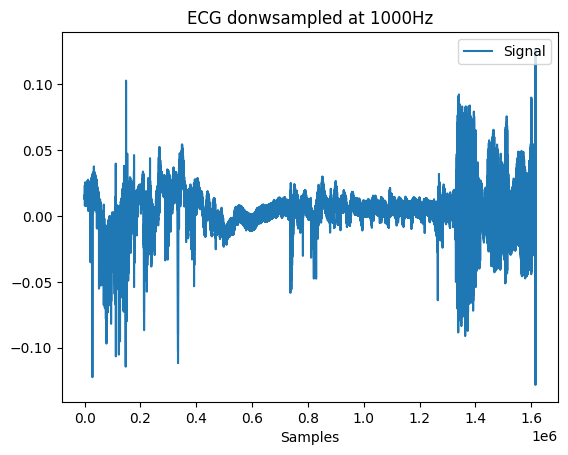

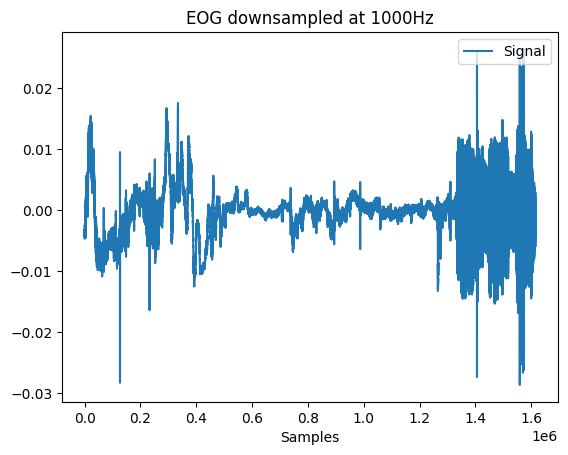

In [12]:
# Downsample ECG and EOG signal
ecg_ds = nk.signal_resample(ecg, sampling_rate=2000, desired_sampling_rate=1000)
eog_ds = nk.signal_resample(eog, sampling_rate=2000, desired_sampling_rate=1000)


nk.signal_plot(ecg_ds, title="ECG donwsampled at 1000Hz")
nk.signal_plot(eog_ds, title="EOG downsampled at 1000Hz")

print(f"Number of data before downsampling: {len(ecg)}")
print(f"Number of data after downsampling: {len(ecg_ds)}")

## Find ECG peaks

{'Peaks': array([     84,     188,     220, ..., 1615161, 1615249, 1615419],
      dtype=int64), 'Distance': array([104.,  32.,  32., ...,  54.,  88., 170.]), 'Height': array([2.27858221e-04, 4.80702422e-06, 2.65570982e-04, ...,
       2.60952100e-07, 1.78024484e-05, 5.15419469e-03]), 'Width': array([24.21222505,  7.39929568, 30.03062976, ...,  0.63866851,
        3.17142461, 23.44576558]), 'Onsets': array([     48,     111,     197, ..., 1615124, 1615162, 1615253],
      dtype=int64), 'Offsets': array([    111,     197,     250, ..., 1615162, 1615253, 1615429],
      dtype=int64)}


c:\Users\eleon\Desktop\Master\FJS 23\Master Project\sensor-data-analysis-pipeline\.venv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eleon\Desktop\Master\FJS 23\Master Project\sensor-data-analysis-pipeline\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


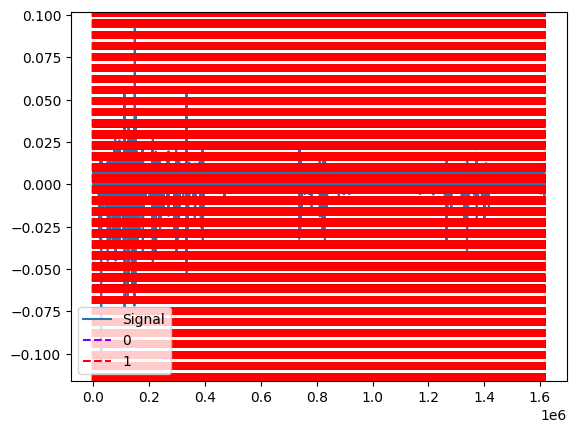

In [32]:
cleaned = nk.ecg_clean(ecg_ds, method="neurokit")
portion = cleaned[:1000]

peaks = nk.signal_findpeaks(cleaned)

print(peaks)

nk.events_plot([peaks["Onsets"], peaks["Peaks"]], cleaned)

## Interval-related Analysis

In [34]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

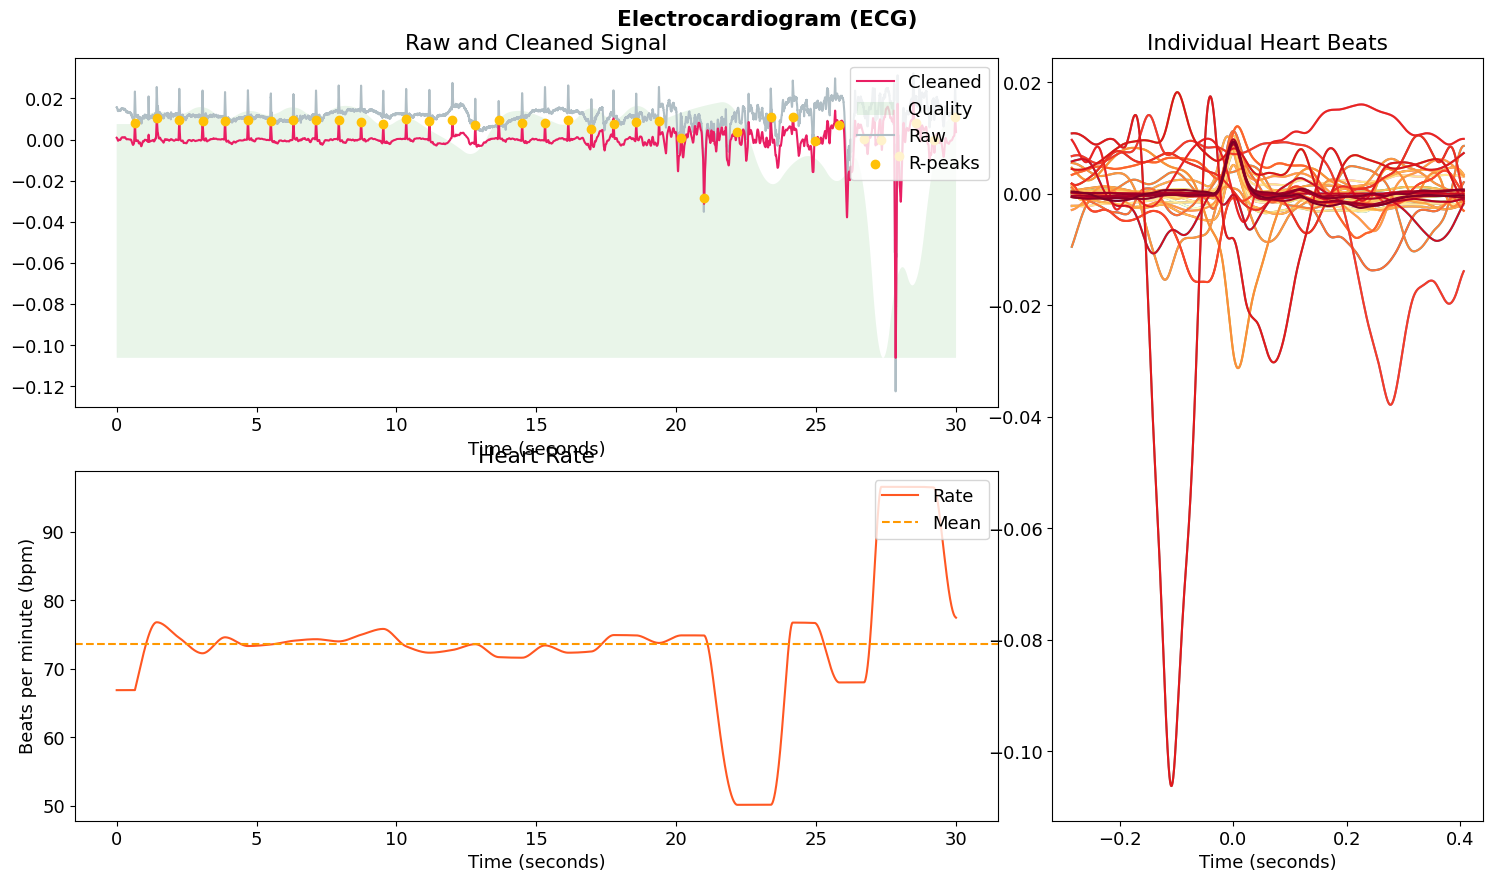

In [35]:
plot = nk.ecg_plot(ecg_signals[:60000], sampling_rate=2000)

In [36]:
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,67.115834,[[1794.6703724291274]],[[338.83105959619513]],[[153.77329767916223]],[[214.0222917518712]],[[137.04296556417097]],[[228.39946441190932]],[[89.8186510818239]],[[256.11667176093283]],[[345.39706801591893]],...,[[0.9807379183125083]],[[9.20485037243682]],[[0.7340354173093111]],[[0.7065767088643834]],[[1.2184647916949405]],[[1.3383596198967147]],[[0.848683467009383]],[[1.83970584129263]],[[2.2923705420181006]],[[0.6791921513348624]]


In [46]:
print(eog_signals[eog_signals['EOG_Blinks']==1])

          EOG_Raw  EOG_Clean  EOG_Blinks   EOG_Rate
223629  -0.001174   0.003625         1.0   0.464673
294160  -0.000638   0.002499         1.0   1.701380
296472  -0.002047   0.002963         1.0  51.903114
301096   0.000769   0.002566         1.0  25.951557
664225   0.008656   0.005370         1.0   0.330461
667913   0.017288   0.011645         1.0  32.537961
994072   0.000728   0.001747         1.0   0.367919
1788301  0.004611   0.004354         1.0   0.151090
2529699  0.000316   0.003756         1.0   0.161856
2547844 -0.001616   0.002405         1.0   6.613392


## Preprocessing functions

In [68]:
def ecg_preprocessing(ecg_signal, sampling_rate=2000, desired_sampling_rate=1000):
    # Downsample the signal to 1000Hz
    ecg_downsampled = nk.signal_resample(ecg_signal, sampling_rate=sampling_rate, desired_sampling_rate=desired_sampling_rate)
    # Clean the signal
    ecg_cleaned = nk.ecg_clean(ecg_downsampled, method="neurokit")

    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks, sampling_rate=desired_sampling_rate, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=desired_sampling_rate)


    signals = pd.DataFrame({"ECG_Raw": ecg_downsampled,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    
    signals = pd.concat([signals, instant_peaks], axis=1)
    info = rpeaks

    return signals, info


def eog_preprocessing(eog_signal, sampling_rate=2000, desired_sampling_rate=1000):
    # Downsample the signal to 1000Hz
    eog_downsampled = nk.signal_resample(eog_signal, sampling_rate=sampling_rate, desired_sampling_rate=desired_sampling_rate)
    # Clean the signal
    eog_cleaned = nk.eog_clean(eog_downsampled, method="neurokit")

    blinks = nk.eog_findpeaks(eog_cleaned, sampling_rate=desired_sampling_rate, method="mne")
    blinks_01 = np.zeros(len(eog_downsampled))
    blinks_01[blinks] = 1

    rate = nk.signal_rate(blinks, sampling_rate=desired_sampling_rate, desired_length=len(eog_cleaned))


    signals = pd.DataFrame({"EOG_Raw": eog_downsampled,
                            "EOG_Clean": eog_cleaned,
                            "EOG_Blinks": blinks_01,
                            "EOG_Rate": rate})
    
    info = {
        'EOG_Blinks': blinks,
        'sampling_rate': 1000
    }

    return signals, info


    

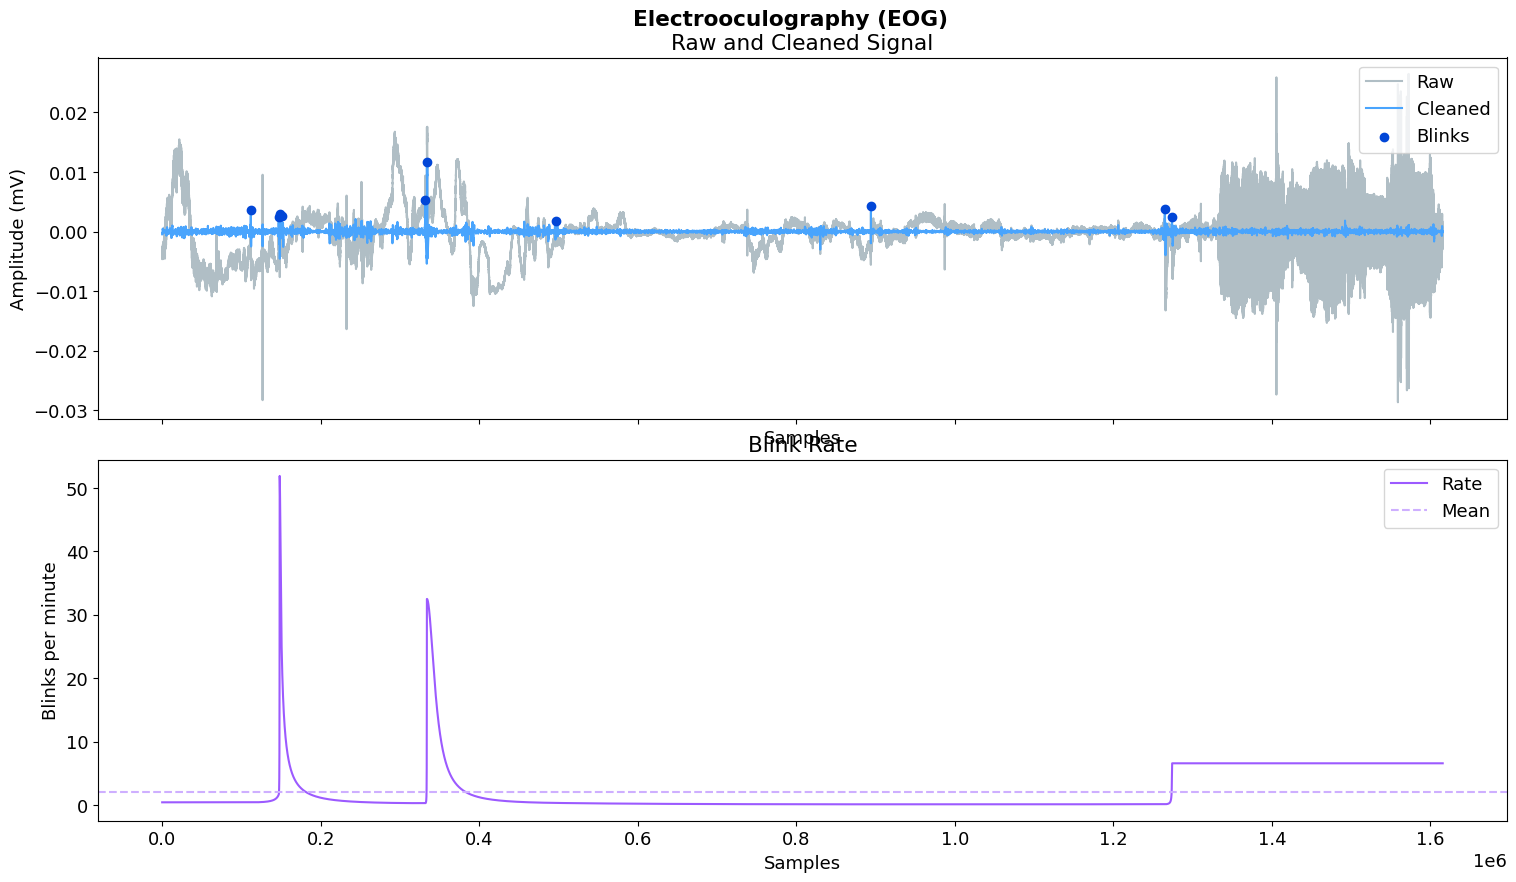

In [72]:
eog_signals, eog_info = eog_preprocessing(eog)

nk.eog_plot(eog_signals)

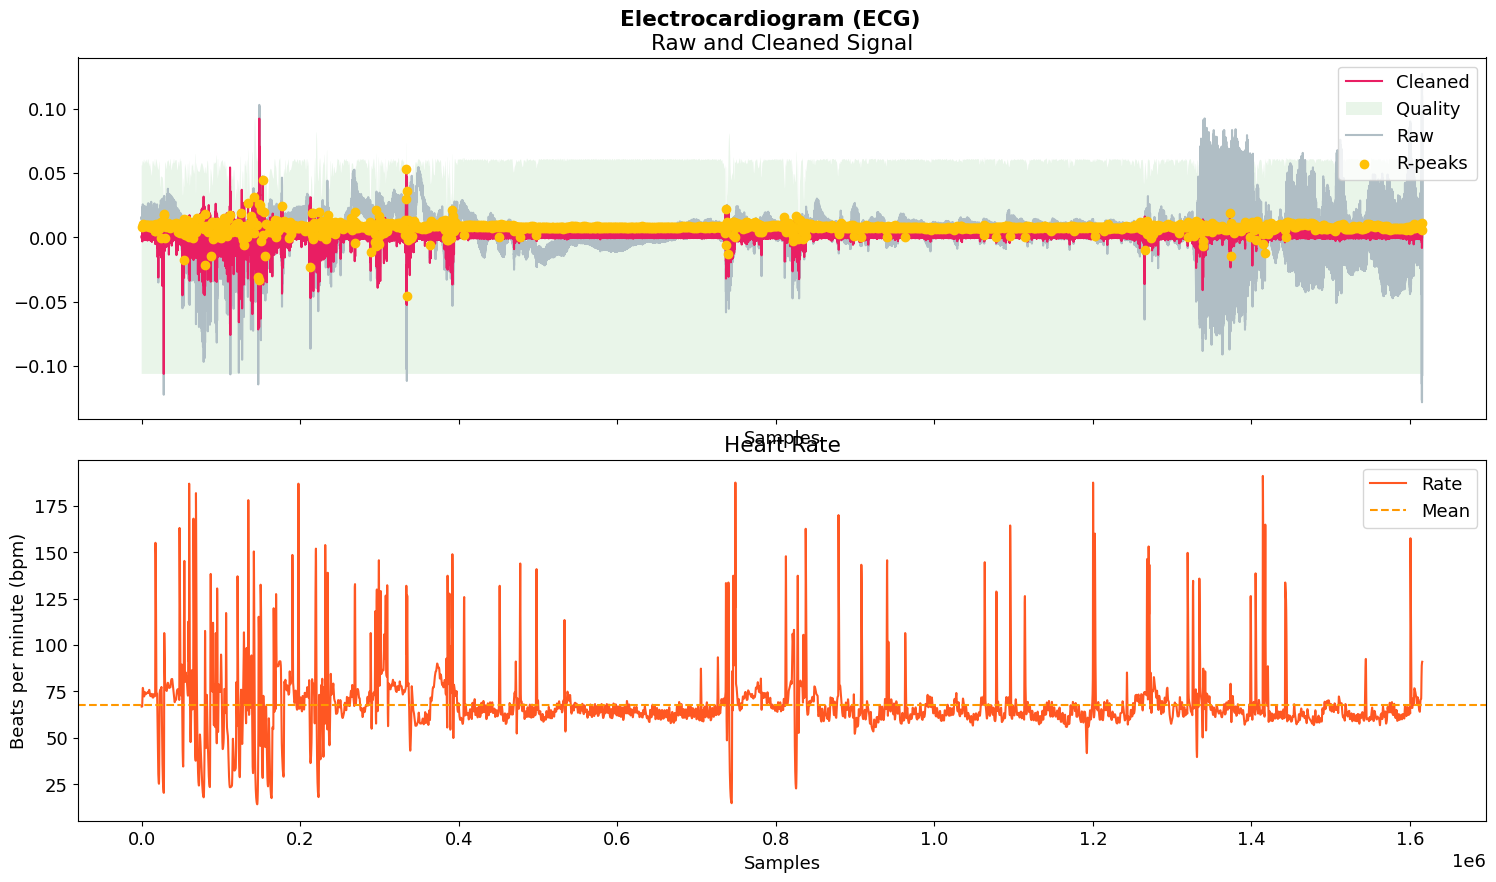

In [73]:
ecg_signals, ecg_info = ecg_preprocessing(ecg) 
nk.ecg_plot(ecg_signals)

## Detect sleep stages

In [ ]:
##TODO: find suitable method to detect sleep stage. As of now we have no labelled data that could help us with the classification.